# k-means

In [1]:
import numpy  as np
import pandas as pd

from matplotlib import pyplot as plt

plt.style.use('bmh')

In [2]:
def two_bivariate_normals( M1,S1,N1, M2,S2,N2 ):
    X1 = np.random.multivariate_normal(M1,S1,N1)
    X2 = np.random.multivariate_normal(M2,S2,N2)
    
    Y      = -np.ones(N1+N2)
    Y[N1:] = 1
    
    return np.concatenate( (X1,X2),axis=0 ).copy(), Y.copy()

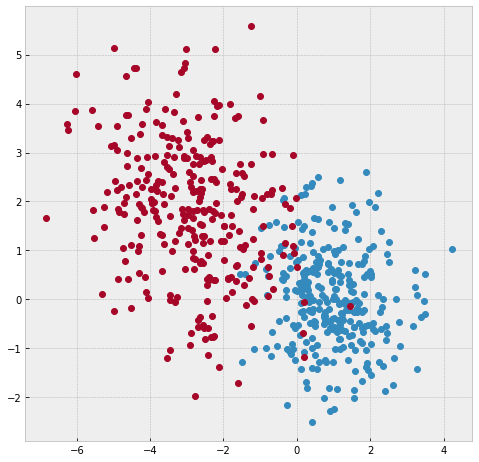

In [3]:
M_C1 = np.array([    1.0,  0.0 ])
S_C1 = np.array([ [  1.0,  0.0 ],
                  [  0.0,  1.0 ] ])
N_C1 = 300

M_C2 = np.array([   -3.0,  2.0 ])
S_C2 = np.array([ [  2.0, -0.5 ],
                  [ -0.5,  2.0 ] ])
N_C2 = 300


X,Y = two_bivariate_normals( M_C1,S_C1,N_C1, M_C2,S_C2,N_C2)

plt.figure(figsize=(8,8))
plt.plot( X[Y==-1,0],X[Y==-1,1], 'o' )
plt.plot( X[Y== 1,0],X[Y== 1,1], 'o' )

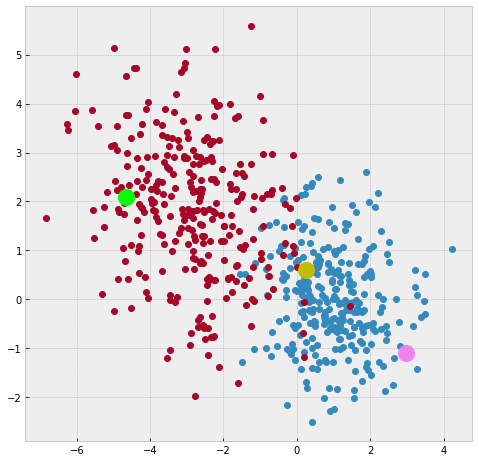

In [4]:
C = np.random.normal(0,2,2)

plt.figure(figsize=(8,8))
plt.plot( X[Y==-1,0],X[Y==-1,1], 'o' )
plt.plot( X[Y== 1,0],X[Y== 1,1], 'o' )
plt.plot( C[0]      ,C[1]      , 'o'           , 
                                 color='violet',
                                 markersize=16   )

plt.plot( X[0,0]    ,X[0,1]    , 'o'           , 
                                 color='y'     ,
                                 markersize=16   )
plt.plot( X[-1,0]   ,X[-1,1]   , 'o'           , 
                                 color='lime'  ,
                                 markersize=16   )

In [5]:
print( 'Distancia cuadrada de C a X_{:04d}: {:6.4f}' .format( 0          ,np.dot( C-X[ 0], C-X[ 0]) )  )
print( 'Distancia cuadrada de C a X_{:04d}: {:6.4f}' .format( N_C1+N_C2-1,np.dot( C-X[-1], C-X[-1]) )  )

Distancia cuadrada de C a X_0000: 10.3068
Distancia cuadrada de C a X_0599: 68.2858


In [6]:
k = 2
C = np.random.normal(0,5, X.shape[-1]*k).reshape( k,X.shape[-1] )
C

array([[ 0.50232254,  3.67385582],
       [ 0.9778922 , -0.16611134]])

In [78]:
def plot_classes(X,Y,b=0,msize=10):
    color = ['g','b','y','r','k','c','lime','orange']
    for c,i in enumerate( np.unique(Y) ):
        plt.plot( X[Y==i,0],X[Y==i,1], 'o',color=color[c+b], markersize=msize )
        plt.plot( X[Y==i,0],X[Y==i,1], 'o',color=color[c+b], markersize=msize )

def plot_centroid_history(C_H):
    l = len(C_H)
    for e,ch in enumerate(C_H):
        for c in ch:
            alpha = 1+np.log10( (e+1)/l )
            plt.plot( c[0],c[1], 'o'               , 
                                  color     ='red' ,
                                  alpha     = alpha,
                                  markersize=16      )

In [8]:
D = []
for c in C:
    d = c[np.newaxis] - X
    d = np.diag(  np.dot( d,d.T )  )
    D.append(d)

D = np.array(D)

In [9]:
D.shape

(2, 600)

In [11]:
W = np.argmin(D,axis=0)
C

array([[ 0.50232254,  3.67385582],
       [ 0.9778922 , -0.16611134]])

In [14]:
for i in range(k):
    C[i] = X[W==i].mean(axis=0)

C

array([[-2.91812471,  2.62103405],
       [ 0.08517359,  0.02612528]])

IndexError: invalid index to scalar variable.

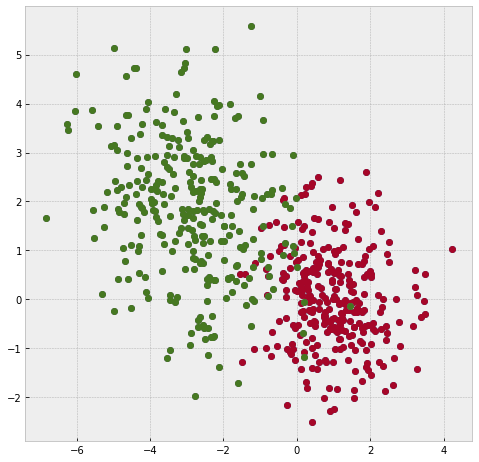

In [15]:
plot_classes(X,Y)
plot_centroid_history(C)

In [84]:
def d2_eucl(X,C):
    D = []
    for c in C:
        d = c[np.newaxis] - X
        d = np.diag(  np.dot( d,d.T )  )
        D.append(d)
    
    return np.array(D).copy()

k = 2
C = np.random.normal(0,5, X.shape[-1]*k).reshape( k,X.shape[-1] )

eps = 1

C_hist = []
C_hist.append(C)
while(eps>.01):
    C_new  = []
    W      = np.argmin( d2_eucl(X,C),axis=0 )
    for i in np.unique(W):
        C_new.append( X[W==i].mean(axis=0) )

    C_new = np.array(C_new)
    try:
        eps   = C_hist[-1]-C_new
        eps   = np.abs(eps).sum()
        C_hist.append(C_new)
        C     = C_new
    except:
        pass
    
    print(eps)

9.176868607604709
2.303945258981739
0.8712054908693027
0.45474366137777955
0.24132913001474487
0.05945614898138085
0.03927653305141533
0.0


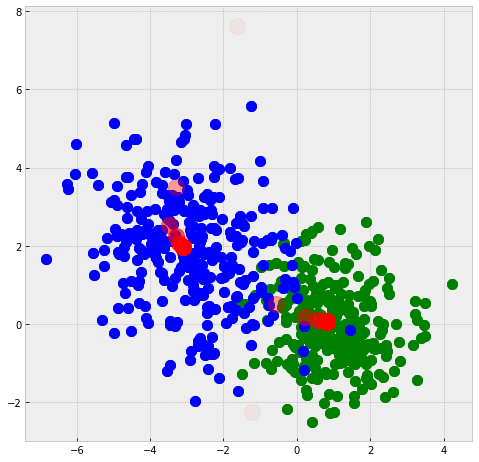

In [85]:
plt.figure(figsize=(8,8))
plot_classes(X,Y)
plot_centroid_history(C_hist)

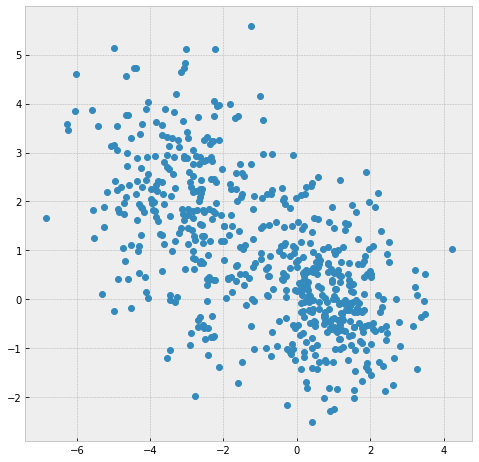

In [86]:
plt.figure(figsize=(8,8))
plt.plot(X[:,0],X[:,1],'o')

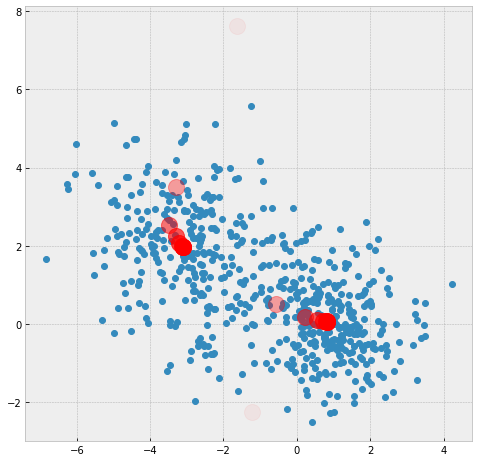

In [87]:
plt.figure(figsize=(8,8))
plt.plot(X[:,0],X[:,1],'o')
plot_centroid_history(C_hist)

In [88]:
L      = np.argmin( d2_eucl(X,C),axis=0 )
L

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

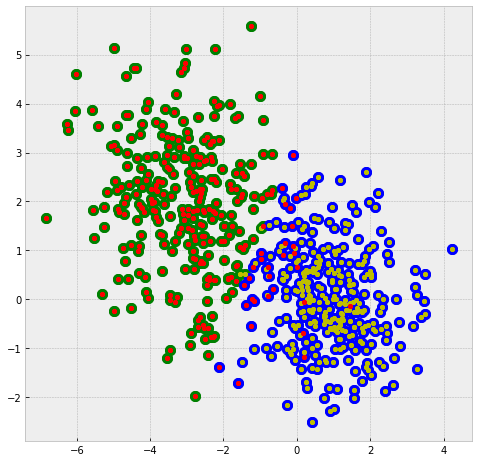

In [93]:
plt.figure(figsize=(8,8))
plot_classes(X,L)
plot_classes(X,Y,2,4)